### Read and explore the datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quilt
import seaborn as sns
import missingno as msno
import plotly.offline
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')


#init_notebook_mode

# pip install cufflinks
# pip install plotly_express
# cufflinks.__version__
# pip install cufflinks --upgrade
# pip install python-quilt
# pip install missingno

In [4]:
#Read datasets, no description available. ALl files available at 
# http://www.tsb.gc.ca/eng/stats/aviation/data-5.html. Adding conditions as warning
# received: Columns (+30 in total)have mixed types. Specify dtype option on 
# import or set low_memory=False.


df1 = pd.read_csv('ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv') 
#                   sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df2 = pd.read_csv('ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv')
#                  sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df3 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')
#df4 = pd.read_csv('ASISdb_MDOTW_VW_SURVIVABILITY_PUBLIC.csv')
dfo = pd.read_csv('23100018.csv')

### Main Variables Definition

 ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv : Indexed by 'OccID' & 'OccNo', includes also 'OccTypeID',                                                                        'OccTypeID_DisplayEng','Latitude', 'Longitude', 'OccDate', 'OccTypeID',  
 







#### Full definition of contents  <http://www.tsb.gc.ca/eng/stats/aviation/2016/ssea-ssao-2016.html>
<script src="http://www.tsb.gc.ca/includes/js/i18n/en.min.js"></script>

In [5]:
#Rename occid
df2 = df2.rename(index=str, columns={"occid": "OccID"})

In [6]:
df2.shape

(57227, 194)

In [7]:
df1.shape

(47226, 246)

In [8]:
df1.head()

OccID     OccNo  AirportID AirportID_AirportName  AirportID_CountryID  \
0  152828  A19P0071     1984.0     Erik Nielsen Intl                  2.0   
1  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
2  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
3  152826  A19P0070      109.0     (CAMPBELL ISLAND)                  2.0   
4  152825  A19P0069     1912.0        Vancouver Intl                  2.0   

  AirportID_CountryID_DisplayEng AirportID_CountryID_DisplayFre  \
0                         CANADA                         CANADA   
1                         CANADA                         CANADA   
2                         CANADA                         CANADA   
3                         CANADA                         CANADA   
4                         CANADA                         CANADA   

   Airport_ProvinceID AirportID_ProvinceID_DisplayEng  \
0                24.0                           YUKON   
1                24.0                           YUKON   
2                24.0                           YUKON   
3                12.0                BRITISH COLUMBIA   
4                12.0                BRITISH COLUMBIA   

  AirportID_ProvinceID_DisplayFre  ... InitialPositionEnum_DisplayFre  \
0                           YUKON  ...                            NaN   
1                           YUKON  ...                            NaN   
2                           YUKON  ...                            NaN   
3            COLOMBIE-BRITANNIQUE  ...                            NaN   
4            COLOMBIE-BRITANNIQUE  ...                            NaN   

   FinalPositionEnum  FinalPositionEnum_DisplayEng  \
0                NaN                           NaN   
1                NaN                           NaN   
2                NaN                           NaN   
3                NaN                           NaN   
4                NaN                           NaN   

  FinalPositionEnum_DisplayFre FullProcedureIND  FullProcedureIND_DisplayEng  \
0                          NaN              NaN                          NaN   
1                          NaN              NaN                          NaN   
2                          NaN              NaN                          NaN   
3                          NaN              NaN                          NaN   
4                          NaN              NaN                          NaN   

   FullProcedureIND_DisplayFre SurfaceContaminationID  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

  SurfaceContaminationID_DisplayEng SurfaceContaminationID_DisplayFre  
0                               NaN                               NaN  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                               NaN                               NaN  
4                               NaN                               NaN  

[5 rows x 246 columns]

In [9]:
df3.shape

(105506, 14)

### Finding unique values on datasets

In [10]:
df1u = df1.OccID.nunique()

In [11]:
df2u = df2.OccID.nunique()

In [12]:
df3u = df3.OccID.nunique()

In [13]:
unique_ = pd.DataFrame({'Dataset' :["AC","EVE", "PHA"],#"OCC","SUR"], 
                        "Unique":[df1u,df2u, df3u]})
unique_.sort_values(by="Unique", ascending=False)

Dataset  Unique
0      AC   43855
1     EVE   43854
2     PHA   43814

### Merging the three datasets with accidents information

In [14]:
# dfm = df1.merge(df2, how='left', left_on=('OccID'), right_on=('OccID'))
# .merge(df3, how='left', left_on=('OccID'), right_on=('OccID')) 

In [15]:
from functools import reduce
dfs = [df1,df2,df3]
dfm = reduce(lambda left,right: pd.merge(left,right, on='OccID'), dfs)

In [16]:
dfm #dfm.TotalFatalCount

OccID   OccNo_x  AirportID            AirportID_AirportName  \
0       152828  A19P0071     1984.0                Erik Nielsen Intl   
1       152827  A19W0070     1984.0                Erik Nielsen Intl   
2       152827  A19W0070     1984.0                Erik Nielsen Intl   
3       152827  A19W0070     1984.0                Erik Nielsen Intl   
4       152827  A19W0070     1984.0                Erik Nielsen Intl   
5       152827  A19W0070     1984.0                Erik Nielsen Intl   
6       152827  A19W0070     1984.0                Erik Nielsen Intl   
7       152827  A19W0070     1984.0                Erik Nielsen Intl   
8       152827  A19W0070     1984.0                Erik Nielsen Intl   
9       152826  A19P0070      109.0                (CAMPBELL ISLAND)   
10      152826  A19P0070      109.0                (CAMPBELL ISLAND)   
11      152826  A19P0070      109.0                (CAMPBELL ISLAND)   
12      152825  A19P0069     1912.0                   Vancouver Intl   
13      152825  A19P0069     1912.0                   Vancouver Intl   
14      152825  A19P0069     1912.0                   Vancouver Intl   
15      152822  A19C0063     1366.0             POINTS NORTH LANDING   
16      152820  A19C0062     2001.0  James Armstrong Richardson Intl   
17      152818  A19Q0084     1448.0                 Jean Lesage Intl   
18      152818  A19Q0084     1448.0                 Jean Lesage Intl   
19      152814  A19F0155     4440.0        Ioannis Kapodistrias Intl   
20      152813  A19A0040        NaN                              NaN   
21      152813  A19A0040        NaN                              NaN   
22      152813  A19A0040        NaN                              NaN   
23      152812  A19Q0082      433.0      Pierre Elliott Trudeau Intl   
24      152812  A19Q0082      433.0      Pierre Elliott Trudeau Intl   
25      152812  A19Q0082      433.0      Pierre Elliott Trudeau Intl   
26      152812  A19Q0082      433.0      Pierre Elliott Trudeau Intl   
27      152812  A19Q0082      433.0      Pierre Elliott Trudeau Intl   
28      152809  A19F0154        NaN                              NaN   
29      152809  A19F0154        NaN                              NaN   
...        ...       ...        ...                              ...   
181434   45017  A76A0018        NaN                              NaN   
181435   45016  A76A0017        NaN                              NaN   
181436   45015  A76A0016        NaN                              NaN   
181437   45015  A76A0016        NaN                              NaN   
181438   45014  A76A0015        NaN                              NaN   
181439   45014  A76A0015        NaN                              NaN   
181440   45013  A76A0014        NaN                              NaN   
181441   45012  A76A0013        NaN                              NaN   
181442   45011  A76A0012        NaN                              NaN   
181443   45010  A76A0011        NaN                              NaN   
181444   45009  A76A0010        NaN                              NaN   
181445   45009  A76A0010        NaN                              NaN   
181446   45008  A76A0009        NaN                              NaN   
181447   45008  A76A0009        NaN                              NaN   
181448   45007  A76A0008        NaN                              NaN   
181449   45006  A76A0007        NaN                              NaN   
181450   45006  A76A0007        NaN                              NaN   
181451   45005  A76A0006        NaN                              NaN   
181452   45005  A76A0006        NaN                              NaN   
181453   45005  A76A0006        NaN                              NaN   
181454   45005  A76A0006        NaN                              NaN   
181455   45004  A76A0005        NaN                              NaN   
181456   45004  A76A0005        NaN                              NaN   
181457   45004  A76A0005        NaN              

### Preprocessing dataset with information about movements

In [17]:
dfo.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Class of operation',
       'Rank and number of movements', 'UOM', 'UOM_ID', 'SCALAR_FACTOR',
       'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL',
       'TERMINATED', 'DECIMALS'],
      dtype='object')

In [18]:
mov = dfo.groupby(['REF_DATE','GEO', 'Class of operation', 'VALUE'])

In [19]:
mov.first()

DGUID  \
REF_DATE GEO                                                Class of operation                   VALUE                  
1997     Abbotsford, British Columbia                       Itinerant movements                  18               NaN   
                                                                                                 56769            NaN   
                                                            Local movements                      5                NaN   
                                                                                                 79369            NaN   
                                                            Total, itinerant and local movements 12               NaN   
                                                                                                 136138           NaN   
         Alberta                                            Itinerant movements                  452402   2016A000248   
                                                            Local movements                      175239   2016A000248   
                                                            Total, itinerant and local movements 627641   2016A000248   
         Boundary Bay, British Columbia                     Itinerant movements                  14               NaN   
                                                                                                 68630            NaN   
                                                            Local movements                      1                NaN   
                                                                                                 139509           NaN   
                                                            Total, itinerant and local movements 4                NaN   
                                                                                                 208139           NaN   
         British Columbia                                   Itinerant movements                  784723   2016A000259   
                                                            Local movements                      443831   2016A000259   
                                                            Total, itinerant and local movements 1228554  2016A000259   
         Calgary International, Alberta                     Itinerant movements                  3                NaN   
                                                                                                 224561           NaN   
                                                            Local movements                      37               NaN   
                                                                                                 14397            NaN   
                                                            Total, itinerant and local movements 3                NaN   
                                                                                                 238958           NaN   
         Calgary/Springbank, Alberta                        Itinerant movements                  27               NaN   
                                                                                                 41491            NaN   
                                                            Local movements                      3                NaN   
                                                                                                 87107            NaN   
                                                            Total, itinerant and local movements 13               NaN   
                                                                                                 128598           NaN   
...                                                                                                               ...   
2018     Whitehorse International, Yukon                    Local movements                      14170            NaN  

In [20]:
# mov = (dfo[dfo['REF_DATE'].notnull() & (dfo['GEO']=='Total Canadian Airports') &
#     (dfo['Class of operation']=='Total, itinerant and local movements')]), (dfo['VALUE'])

mov = (dfo[dfo['REF_DATE'].notnull() & (dfo['GEO']=='Total Canadian Airports') &
    (dfo['Class of operation']=='Total, itinerant and local movements')]), (dfo['REF_DATE'], dfo['VALUE'])
           
print (mov)

(Empty DataFrame
Columns: [REF_DATE, GEO, DGUID, Class of operation, Rank and number of movements, UOM, UOM_ID, SCALAR_FACTOR, SCALAR_ID, VECTOR, COORDINATE, VALUE, STATUS, SYMBOL, TERMINATED, DECIMALS]
Index: [], (0       1997
1       1997
2       1997
3       1997
4       1997
5       1997
6       1997
7       1997
8       1997
9       1997
10      1997
11      1997
12      1997
13      1997
14      1997
15      1997
16      1997
17      1997
18      1997
19      1997
20      1997
21      1997
22      1997
23      1997
24      1997
25      1997
26      1997
27      1997
28      1997
29      1997
        ... 
6330    2018
6331    2018
6332    2018
6333    2018
6334    2018
6335    2018
6336    2018
6337    2018
6338    2018
6339    2018
6340    2018
6341    2018
6342    2018
6343    2018
6344    2018
6345    2018
6346    2018
6347    2018
6348    2018
6349    2018
6350    2018
6351    2018
6352    2018
6353    2018
6354    2018
6355    2018
6356    2018
6357    2018
6358    2018
6359 

In [21]:
dfm.shape

(181464, 452)

In [22]:
dfm.head()

OccID   OccNo_x  AirportID AirportID_AirportName  AirportID_CountryID  \
0  152828  A19P0071     1984.0     Erik Nielsen Intl                  2.0   
1  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
2  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
3  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
4  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   

  AirportID_CountryID_DisplayEng AirportID_CountryID_DisplayFre  \
0                         CANADA                         CANADA   
1                         CANADA                         CANADA   
2                         CANADA                         CANADA   
3                         CANADA                         CANADA   
4                         CANADA                         CANADA   

   Airport_ProvinceID AirportID_ProvinceID_DisplayEng  \
0                24.0                           YUKON   
1                24.0                           YUKON   
2                24.0                           YUKON   
3                24.0                           YUKON   
4                24.0                           YUKON   

  AirportID_ProvinceID_DisplayFre  ... EventPhaseSequence  \
0                           YUKON  ...                  1   
1                           YUKON  ...                  1   
2                           YUKON  ...                  2   
3                           YUKON  ...                  3   
4                           YUKON  ...                  4   

                                 EventID_DisplayEng  \
0  Flight crew incapacitation/illness/medical issue   
1                           Smoke - Passenger cabin   
2                                   Smoke - Cockpit   
3                                       Smoke - APU   
4          Declared Emergency/Priority/ARFF Standby   

                             EventID_DisplayFre  \
0  Maladie/Incapacité de l'équipage de conduite   
1                      Fumée - Cabine passagers   
2                     Fumée - Poste de pilotage   
3                                   Fumée - APU   
4                     Déclaration d'une urgence   

                                    FullEventDescEng  \
0  [Aircraft operation general].[Flight crew].[Fl...   
1  [Aircraft/system/component related event (Airc...   
2  [Aircraft/system/component related event (Airc...   
3  [Aircraft/system/component related event (Airc...   
4  [Consequential events].[Declared Emergency/Pri...   

                                    FullEventDescFre  PhaseID  \
0  [Exploitation de l'aéronef - général].[Équipag...    184.0   
1  [Evénement aéronef/système/composant (Aéronef/...    211.0   
2  [Evénement aéronef/système/composant (Aéronef/...    211.0   
3  [Evénement aéronef/système/composant (Aéronef/...    211.0   
4  [Evénements résultants, conséquences].[Déclara...    211.0   

               PhaseID_DisplayEng           PhaseID_DisplayFre  \
0                          Cruise                    Croisière   
1  Standing : Engine(s) Shut Down  Stationné - arrêt du moteur   
2  Standing : Engine(s) Shut Down  Stationné - arrêt du moteur   
3  Standing : Engine(s) Shut Down  Stationné - arrêt du moteur   
4  Standing : Engine(s) Shut Down  Stationné - arrêt du moteur   

                                    FullPhaseDescEng  \
0  [POWERED FIXED-WING AIRCRAFT].[En-route].[Cruise]   
1  [POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...   
2  [POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...   
3  [POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...   
4  [POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...   

                                    FullPhaseDescFre  
0  [Aéronef à voilure fixe - motorisé].[En route]...  
1  [Aéronef à voilure fixe - motorisé].[Stationne...  
2  [Aéronef à voilure fixe - motorisé].[Stationne...  
3  [Aéronef à voilure fixe - motorisé].[Stationne...  
4  [Aéronef à voilure fixe - motorisé].[Stationne... 

In [23]:
dfm = dfm.sort_values("OccID", ascending=True)
dfm = dfm.drop_duplicates(subset ="OccID") 
#df.dropna(inplace = True)

In [24]:
#msno.matrix(dfm_)

In [25]:
dfm.shape

(43814, 452)

In [26]:
# dfm.Latitude.fillna(0, inplace=True)
# dfm.Longitude.fillna(0, inplace=True) Removed to avoid noise/bias

In [27]:
dfm.isnull().sum()
#dropped the nulls and update the dataframe
# dfm.shape

OccID                                      0
OccNo_x                                    0
AirportID                              26500
AirportID_AirportName                  26500
AirportID_CountryID                    26500
AirportID_CountryID_DisplayEng         26500
AirportID_CountryID_DisplayFre         26500
Airport_ProvinceID                     26920
AirportID_ProvinceID_DisplayEng        26920
AirportID_ProvinceID_DisplayFre        26920
Location                               26500
Latitude                                1330
LatEnum                                 1332
LatEnum_DisplayEng                      1332
LatEnum_DisplayFre                      1332
Longitude                               1326
LongEnum                                1517
LongEnum_DisplayEng                     1517
LongEnum_DisplayFre                     1517
ICAO                                   26500
BearingID                              41378
BearingID_Abbr                         41378
BearingID_

In [28]:
dfm.shape

(43814, 452)

In [29]:
dfm.dtypes

OccID                                    int64
OccNo_x                                 object
AirportID                              float64
AirportID_AirportName                   object
AirportID_CountryID                    float64
AirportID_CountryID_DisplayEng          object
AirportID_CountryID_DisplayFre          object
Airport_ProvinceID                     float64
AirportID_ProvinceID_DisplayEng         object
AirportID_ProvinceID_DisplayFre         object
Location                                object
Latitude                               float64
LatEnum                                float64
LatEnum_DisplayEng                      object
LatEnum_DisplayFre                      object
Longitude                              float64
LongEnum                               float64
LongEnum_DisplayEng                     object
LongEnum_DisplayFre                     object
ICAO                                    object
BearingID                              float64
BearingID_Abb

In [30]:
# dfp = dfm.drop(dfm.columns[dfm.apply(lambda col: col.isnull().sum() > 300)], axis=1)

In [31]:
# dfp.shape

In [32]:
# msno.matrix(dfp)

In [33]:
# dfp.columns

In [34]:
dfm.columns

Index(['OccID', 'OccNo_x', 'AirportID', 'AirportID_AirportName',
       'AirportID_CountryID', 'AirportID_CountryID_DisplayEng',
       'AirportID_CountryID_DisplayFre', 'Airport_ProvinceID',
       'AirportID_ProvinceID_DisplayEng', 'AirportID_ProvinceID_DisplayFre',
       ...
       'EventPhaseSequence', 'EventID_DisplayEng', 'EventID_DisplayFre',
       'FullEventDescEng', 'FullEventDescFre', 'PhaseID', 'PhaseID_DisplayEng',
       'PhaseID_DisplayFre', 'FullPhaseDescEng', 'FullPhaseDescFre'],
      dtype='object', length=452)

In [35]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

In [36]:
dfm.OccDate

181463     1/9/1976 12:00:00 AM
181461    1/19/1976 12:00:00 AM
181460    2/13/1976 12:00:00 AM
181455    2/16/1976 12:00:00 AM
181453    2/25/1976 12:00:00 AM
181450     3/4/1976 12:00:00 AM
181448     5/5/1976 12:00:00 AM
181446    5/29/1976 12:00:00 AM
181444     6/4/1976 12:00:00 AM
181443     6/5/1976 12:00:00 AM
181442     6/6/1976 12:00:00 AM
181441     6/5/1976 12:00:00 AM
181440    5/24/1976 12:00:00 AM
181438    6/19/1976 12:00:00 AM
181437    6/27/1976 12:00:00 AM
181435    7/18/1976 12:00:00 AM
181434    7/19/1976 12:00:00 AM
181431    7/22/1976 12:00:00 AM
181430    7/29/1976 12:00:00 AM
181429    7/31/1976 12:00:00 AM
181428     8/8/1976 12:00:00 AM
181427    8/12/1976 12:00:00 AM
181426    8/13/1976 12:00:00 AM
181424    8/16/1976 12:00:00 AM
181423    8/22/1976 12:00:00 AM
181421    9/13/1976 12:00:00 AM
181420    9/14/1976 12:00:00 AM
181419    9/18/1976 12:00:00 AM
181417    9/19/1976 12:00:00 AM
181415    9/23/1976 12:00:00 AM
                  ...          
160     

In [37]:
dfm['OccDate'] = dfm['OccDate'].astype(str)

In [38]:
dfm['OccDate'] = pd.to_datetime(dfm['OccDate'])

In [39]:
# dfm.OccDate.dt.year

In [40]:
# dfm['OccDate'] = le.fit_transform(dfm['OccDate'].astype(str))

In [41]:
dfm.shape

(43814, 452)

In [42]:
dfm.columns

Index(['OccID', 'OccNo_x', 'AirportID', 'AirportID_AirportName',
       'AirportID_CountryID', 'AirportID_CountryID_DisplayEng',
       'AirportID_CountryID_DisplayFre', 'Airport_ProvinceID',
       'AirportID_ProvinceID_DisplayEng', 'AirportID_ProvinceID_DisplayFre',
       ...
       'EventPhaseSequence', 'EventID_DisplayEng', 'EventID_DisplayFre',
       'FullEventDescEng', 'FullEventDescFre', 'PhaseID', 'PhaseID_DisplayEng',
       'PhaseID_DisplayFre', 'FullPhaseDescEng', 'FullPhaseDescFre'],
      dtype='object', length=452)

In [43]:
dfm.duplicated(subset=None, keep="first").sum()
#found two duplicates
dfm.shape

(43814, 452)

### Visualization

In [44]:
#importing plotly and cufflinks in offline mode
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import geopandas as gp
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [46]:
Long = dfm.Longitude * -1

In [47]:
# colors = dfm

# g = sns.JointGrid('Longitude', "Latitude", colors)
# g = g.plot_marginals(sns.distplot, kde=False, color="grey")
# g.fig.set_size_inches(15,15)

# for OccTypeID, dfm in colors.groupby("OccTypeID"):
#     sns.kdeplot(colors["Longitude"], ax=g.ax_marg_x, legend=False)
#     sns.kdeplot(colors["Latitude"], ax=g.ax_marg_y, vertical=True, legend=False)
#     g.ax_joint.plot(colors["Longitude"], colors["Latitude"], "o", ms=4)
   


#  Test 4, error

# colors = dfm
# g = sns.jointplot("Longitude", "Latitude", data=colors, kind="reg", stat_func=None,
#                   xlim=(0, 60), ylim=(0, 12))


# g.ax_joint.cla() # or g.ax_joint.collections[0].set_visible(False), as per mwaskom's comment

# # set the current axis to be the joint plot's axis
# #plt.sca(g.ax_joint)

# # plt.scatter takes a 'c' keyword for color
# # you can also pass an array of floats and use the 'cmap' keyword to
# # convert them into a colormap
# plt.scatter(dfm.Longitude, dfm.Latitude, c=np.random.random((len(dfm), 3)))

# # Error: Bad colors

# Test 3, error

# colors = np.random.random((len(dfm.OccTypeID),3))
# markers = (['x','o','v','^','<']*100)[:len(dfm.OccTypeID)]

# sns.jointplot(x=dfm.Longitude.values, y=dfm.Latitude.values, data=colors, kind="reg",
#     joint_kws={"color":colors, "marker":markers})
# AttributeError: 'numpy.ndarray' object has no attribute 'get'


# Test 2, error


# event = dfm.OccTypeID

# g = sns.JointGrid(x=dfm.Longitude, y=dfm.Latitude, data=event)
# g = g.plot_joint(plt.scatter, c=np.random.random((len(tips), 3)))
# g = g.plot_marginals(sns.distplot, kde=True, color="k")

# ValueError: cannot reindex from a duplicate axis

# Test 1, working

# sns.jointplot(x=dfm.Longitude.values, y=dfm.Latitude.values, size = 10, cmap='Inferno')
# plt.title('Incidents and Accidents Coordinates')

In [48]:
can_map0 = gp.read_file('C:/Users/fjbel/Google Drive/RoboG/Aviation Project/TSB_Aviation_Accidents_APR2019/lpr_000b16a_e/lpr_000b16a_e.shp')

In [49]:
dfm=dfm

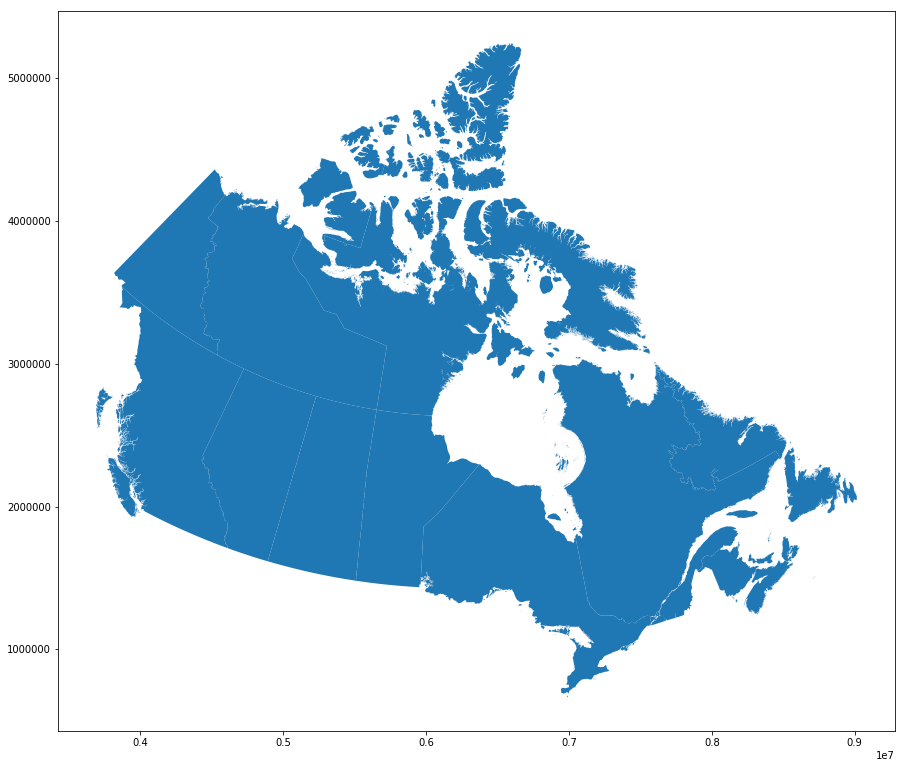

In [50]:
fig, ax = plt.subplots(figsize = (15,15))
can_map0.plot(ax=ax)

In [51]:
can_map1 = gp.read_file('C:/Users/fjbel/Google Drive/RoboG/Aviation Project/TSB_Aviation_Accidents_APR2019/gpr_000b11a_e/gpr_000b11a_e.shp')

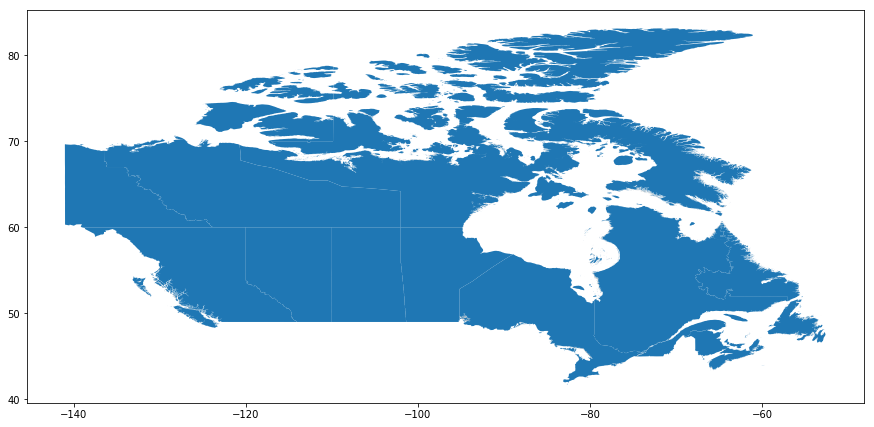

In [52]:
fig, ax = plt.subplots(figsize = (15,15))
can_map1.plot(ax=ax)

In [59]:
geometry = [Point(xy) for xy in zip(Long, dfm['Latitude'])]
geometry[:3]

In [60]:
geo_dfm = gp.GeoDataFrame(dfm, geometry = geometry)
geo_dfm.head

<bound method NDFrame.head of          OccID   OccNo_x  AirportID  \
181463   45001  A76A0002        NaN   
181461   45002  A76A0003        NaN   
181460   45003  A76A0004        NaN   
181455   45004  A76A0005        NaN   
181453   45005  A76A0006        NaN   
181450   45006  A76A0007        NaN   
181448   45007  A76A0008        NaN   
181446   45008  A76A0009        NaN   
181444   45009  A76A0010        NaN   
181443   45010  A76A0011        NaN   
181442   45011  A76A0012        NaN   
181441   45012  A76A0013        NaN   
181440   45013  A76A0014        NaN   
181438   45014  A76A0015        NaN   
181437   45015  A76A0016        NaN   
181435   45016  A76A0017        NaN   
181434   45017  A76A0018        NaN   
181431   45018  A76A0019        NaN   
181430   45019  A76A0020        NaN   
181429   45020  A76A0021        NaN   
181428   45021  A76A0022        NaN   
181427   45022  A76A0023        NaN   
181426   45023  A76A0024        NaN   
181424   45024  A76A0025        Na

In [61]:
geo_dfm.crs = {'init':'epsg:4326'}

In [62]:
geo_dfm.head()

OccID   OccNo_x  AirportID AirportID_AirportName  AirportID_CountryID  \
181463  45001  A76A0002        NaN                   NaN                  NaN   
181461  45002  A76A0003        NaN                   NaN                  NaN   
181460  45003  A76A0004        NaN                   NaN                  NaN   
181455  45004  A76A0005        NaN                   NaN                  NaN   
181453  45005  A76A0006        NaN                   NaN                  NaN   

       AirportID_CountryID_DisplayEng AirportID_CountryID_DisplayFre  \
181463                            NaN                            NaN   
181461                            NaN                            NaN   
181460                            NaN                            NaN   
181455                            NaN                            NaN   
181453                            NaN                            NaN   

        Airport_ProvinceID AirportID_ProvinceID_DisplayEng  \
181463                 NaN                             NaN   
181461                 NaN                             NaN   
181460                 NaN                             NaN   
181455                 NaN                             NaN   
181453                 NaN                             NaN   

       AirportID_ProvinceID_DisplayFre  ...               EventID_DisplayEng  \
181463                             NaN  ...                     Hard landing   
181461                             NaN  ...  Aeroplane flight path deviation   
181460                             NaN  ...     Collision aircraft-snow bank   
181455                             NaN  ...       Collision aircraft-vehicle   
181453                             NaN  ...  Aeroplane flight path deviation   

                                       EventID_DisplayFre  \
181463                                   Atterrissage dur   
181461  Perte de contrôle ou écart par rapport à la tr...   
181460                   Collision d'aéronef avec congère   
181455                  Collision d'aéronef avec véhicule   
181453  Perte de contrôle ou écart par rapport à la tr...   

                                         FullEventDescEng  \
181463  [Aircraft operation general].[Aircraft handlin...   
181461  [Aircraft operation general].[Aeroplane flight...   
181460  [Aircraft operation general].[Aircraft - colli...   
181455  [Aircraft operation general].[Aircraft - colli...   
181453  [Aircraft operation general].[Aeroplane flight...   

                                         FullEventDescFre PhaseID  \
181463  [Exploitation de l'aéronef - général].[Conduit...   108.0   
181461  [Exploitation de l'aéronef - général].[Perte d...   218.0   
181460  [Exploitation de l'aéronef - général].[Collisi...   194.0   
181455  [Exploitation de l'aéronef - général].[Collisi...   194.0   
181453  [Exploitation de l'aéronef - général].[Perte d...   194.0   

        PhaseID_DisplayEng          PhaseID_DisplayFre  \
181463      Run-on landing        Atterrissage glissé    
181461        Take-off run      Roulement au décollage   
181460        Landing roll  Roulement à l'atterrissage   
181455        Landing roll  Roulement à l'atterrissage   
181453        Landing roll  Roulement à l'atterrissage   

                                         FullPhaseDescEng  \
181463            [HELICOPTER].[Landing].[Run-on landing]   
181461  [POWERED FIXED-WING AIRCRAFT].[Take-off].[Take...   
181460  [POWERED FIXED-WING AIRCRAFT].[Landing].[Landi...   
181455  [POWERED FIXED-WING AIRCRAFT].[Landing].[Landi...   
181453  [POWERED FIXED-WING AIRCRAFT].[Landing].[Landi...   

                                         FullPhaseDescFre  \
181463  [Hélicoptère].[Atterrissage].[Atterrissage gli...   
181461  [Aéronef à voilure fixe - motorisé].[Décollage...   
181460  [Aéronef à voilure fixe - motorisé].[Atterriss...   
181455  [Aéronef à voilure fixe - motorisé].[Atterriss...   
181453  [Aéronef à voilure fixe - motorisé].[Atterriss...   

  

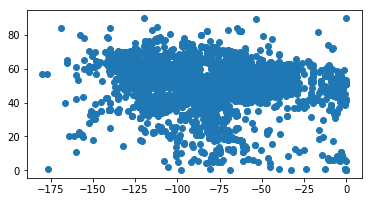

In [63]:
geo_dfm.plot()

(-189.14287644096578, 9.142876440965809, -4.64287644096579, 94.64287644096578)

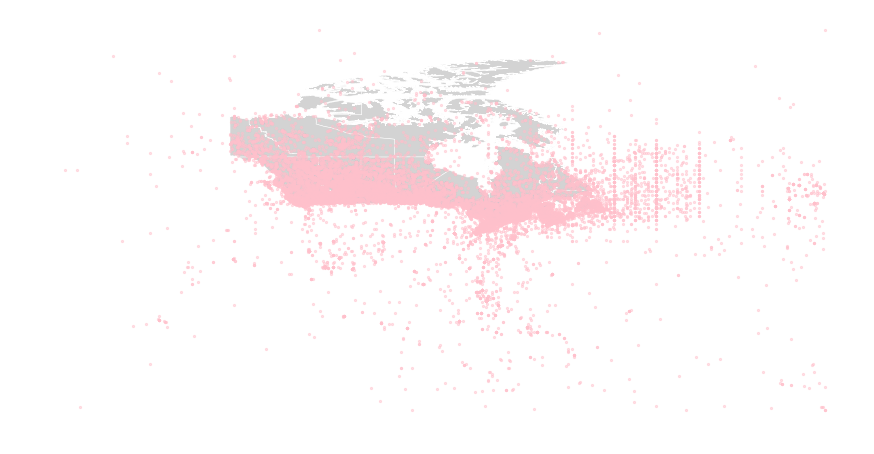

In [65]:
ax = can_map1.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize = (15,15))
geo_dfm.plot(markersize=5, color='pink', alpha=0.5, ax=ax)
ax.axis('off')

In [57]:
import plotly.plotly as py
import plotly.graph_objs as go

In [58]:
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [59]:
# data = dict(type = 'cloropleth', locations = ['AZ', 'CA', 'NY'], locationmode = 'USA-states', 
#            colorscale = 'Portland', text = ['text 1', 'text 2', 'text 3'], z = [1.0, 2.0, 3.0],
#            colorbar = {'title': 'Colorbar Title Goes Here'})
# layout = dict(geo = {'scope' : 'usa'})
# choromap = go. Figure(data = [data], layout = layout)
# iplot(choromap)

In [60]:
#Removed as there are few occurrences before 1976
# dfm.OccDate.dt.year.iplot(kind='histogram', bins=40, theme='white', title='Ocurrences per year')

In [61]:
# #Drop prior to 1976
# old = dfm[(dfm.OccDate.dt.year < 1976)].index
# dfm.drop(old, inplace=True)

In [62]:
dfm.OccDate.dt.year.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per year')

In [63]:
# plt.figure()          
# N = 5
# menMeans = (20, 35, 30, 35, 27)
# menStd = (2, 3, 4, 1, 2)
# width = 0.35       # the width of the bars
# womenMeans = (25, 32, 34, 20, 25)
# womenStd = (3, 5, 2, 3, 3)    
# ind = np.arange(N)
# plt.ylim(0.0, 65.0)
# plt.bar(ind, menMeans, width, color='r', yerr=menStd, label='Men means')
# plt.bar(ind+width, womenMeans, width, color='y', yerr=womenStd, label='Women means')
# plt.ylabel('Bar plot')      

# x = np.linspace(0, N)
# y = np.sin(x)
# axes2 = plt.twinx()
# axes2.plot(x, y, color='k', label='Sine')
# axes2.set_ylim(-1, 1)
# axes2.set_ylabel('Line plot')

# plt.show()

In [64]:
# plt.hist(dfm['OccTypeID_DisplayEng'])

In [65]:
# sns.scatter(x='OccTypeID_DisplayEng', data=df)

In [66]:
#sns.distplot( a=dfm["OccTypeID"], hist=True, kde=False, rug=False )

#px.bar(df, x='OccTypeID_DisplayEng', template='plotly_white')

px.histogram(dfm, x='OperatorTypeID_DisplayEng', color='OccTypeID_DisplayEng',template='plotly')

In [67]:
dfm.OccTypeID_DisplayEng.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per type')

In [100]:
dfm.PhaseID.fillna(0, inplace=True)

In [101]:
dfm.PhaseID.isna().sum()

0

In [105]:
dfm.PhaseID_DisplayEng=dfm.PhaseID_DisplayEng.astype("str")

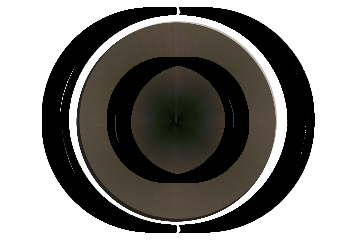

In [204]:
# labels = df.PhaseID
# sizes = df.PhaseID.values
# #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

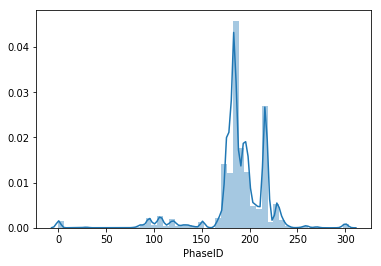

In [107]:
#px.histogram(, x='OrganizationID_DisplayEng', y='OccTypeID_DisplayEng') 
ax = sns.distplot(dfm["PhaseID"])

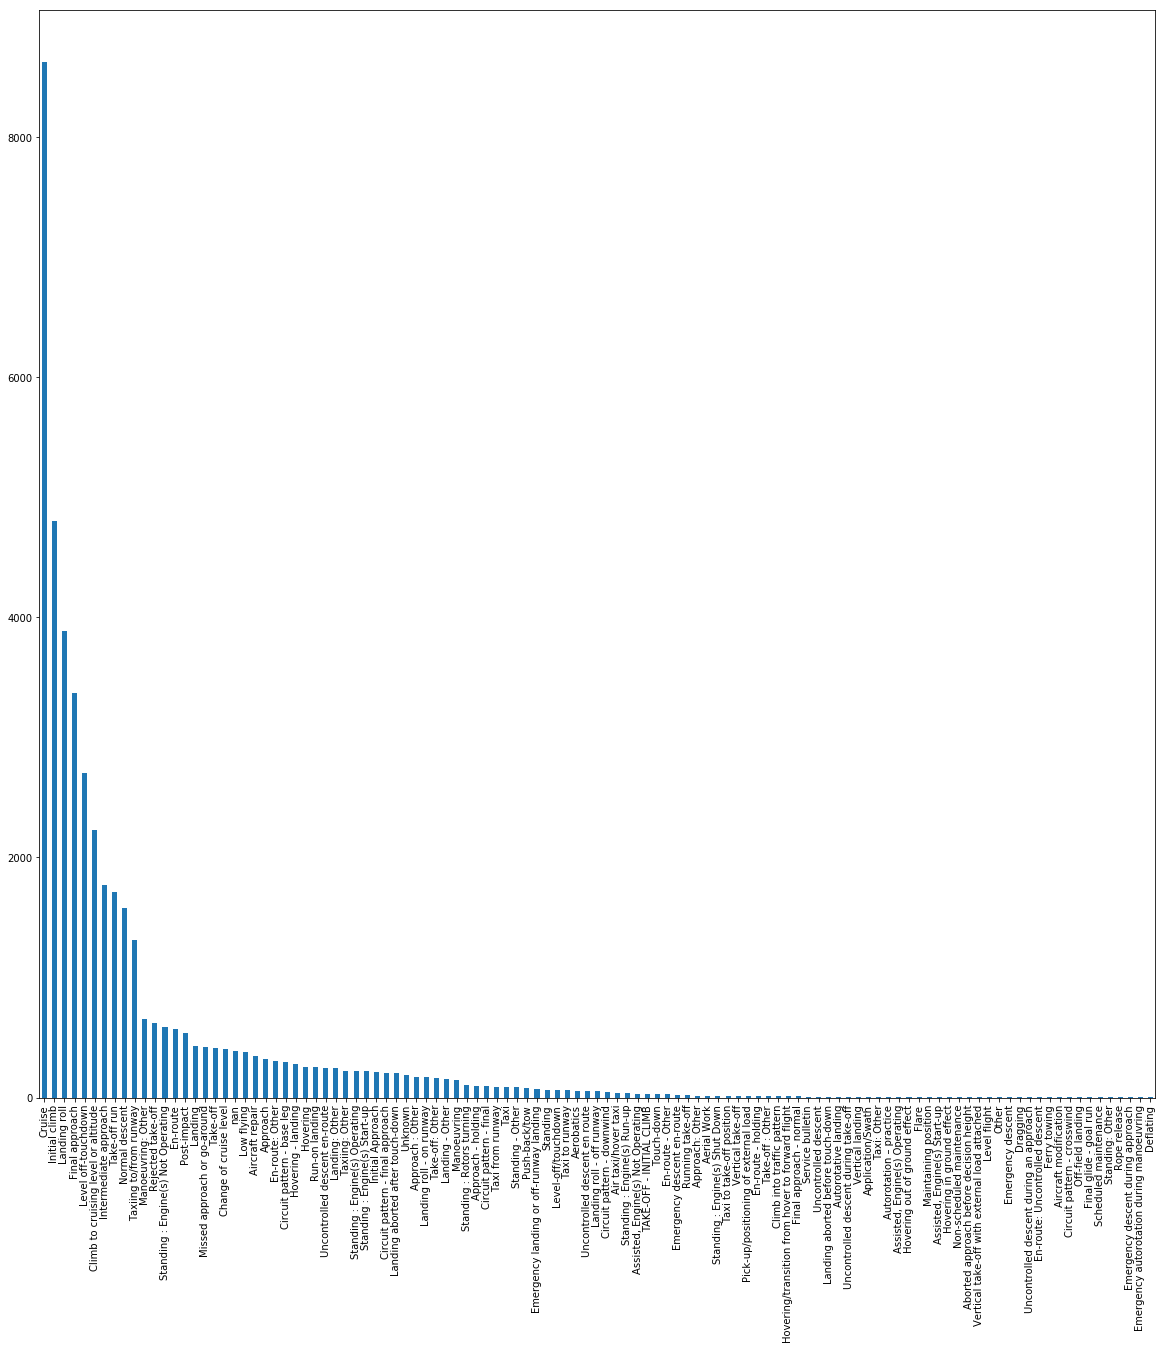

In [116]:
dfm['PhaseID_DisplayEng'].value_counts().plot.bar(figsize=(20,20))

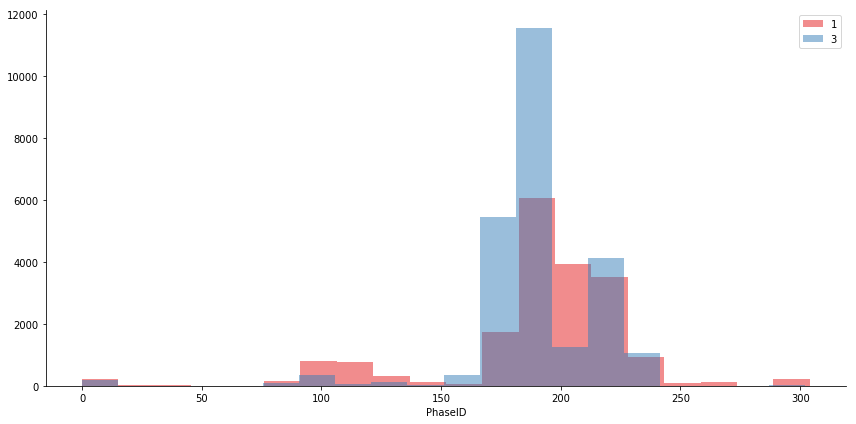

In [119]:
g = sns.FacetGrid(dfm,hue='OccTypeID',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'PhaseID',bins=20,alpha=0.5)
plt.legend()

In [135]:
phases = dfm


for OccTypeID, i in phases.groupby("PhaseID_DisplayEng"):
     sns.kdeplot(phases.PhaseID_DisplayEng[Cruise], ax=g.ax_marg_x, legend=False)
     sns.kdeplot(phases["Initial Climb"], ax=g.ax_marg_y, vertical=True, legend=False)
     g.ax_joint.plot(phases["Cruise"], phases["Initial Climb"], "o", ms=4)
   

NameError: name 'Cruise' is not defined

TypeError: 'method' object is not subscriptable

In [70]:
# g = sns.FacetGrid(dfm,hue='AircraftMakeID',palette='Set1',size=8,aspect=2)
# g = g.map(plt.hist,'TotalFatalCount', bins=20,alpha=0.5)
# plt.legend()

In [71]:
#dfen.TotalFatalCount

In [72]:
# dfa.corr('pearson')

In [ ]:
px.scatter(dfm, x='TotalFatalCount', y="OrganizationID_DisplayEng", size='TotalFatalCount', size_max=50)
#Get another graph for <100 fatalities

In [ ]:
plt.scatter(dfm.OccTypeID_DisplayEng, dfm.AircraftMakeID)
#Get another graph for <100 fatalities

In [ ]:
px.scatter_matrix(dfm, dimensions=["PhaseID_DisplayEng",
                                   "AircraftMakeID_DisplayEng"], color = "TotalFatalCount")#"OrganizationID_DisplayEng", "OperatorTypeID_DisplayEng", 

In [ ]:
px.scatter(dfm, x="AircraftMakeID_DisplayEng", y="TotalFatalCount", size='TotalFatalCount', size_max=60)

### Preprocessing for classification and clustering

In [75]:
#dfp is a subset of dfm
#dfp.shape, dfm.shape

In [74]:
# need features that can be used to predict an incident/accident before it actually happens
#thus, can not have features like fatality, damagelevelID etc.
features=['AircraftTypeID','AircraftMakeID','OrganizationID', 'OperationTypeID',
           'OperatorTypeID', 'WeightCategoryID','NumberOfEngine', 
          'MaxTakeOffWeight', 'Latitude','Longitude', 'OccTime',
           'WakeTurbulenceCategoryID', 'DangerousGoodEnum','PhaseID']
target=['OccTypeID']

In [75]:
df=dfm[features+target]

In [76]:
df.head()


AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
181463             3.0         53063.0         52129.0              9.0   
181461             1.0         50371.0         51282.0              1.0   
181460             1.0         50669.0         51373.0              3.0   
181455             1.0         50443.0         51282.0              1.0   
181453             1.0         50443.0         51282.0              1.0   

        OperatorTypeID  WeightCategoryID  NumberOfEngine  MaxTakeOffWeight  \
181463             5.0               2.0             1.0            2550.0   
181461             5.0               2.0             1.0            2800.0   
181460             5.0               1.0             1.0            2150.0   
181455             5.0               3.0             1.0            8000.0   
181453             5.0               2.0             1.0            2313.0   

         Latitude  Longitude   OccTime  WakeTurbulenceCategoryID  \
181463  48.050000  54.833333  11:30:00                       1.0   
181461  53.566667  64.100000  13:40:00                       1.0   
181460  51.483333  55.816667  18:30:00                       1.0   
181455  53.500000  55.833333  10:00:00                       2.0   
181453  53.316667  60.433333  17:09:00                       1.0   

        DangerousGoodEnum  PhaseID  OccTypeID  
181463                2.0    108.0          1  
181461                2.0    218.0          1  
181460                2.0    194.0          1  
181455                2.0    194.0          1  
181453                2.0    194.0          1

In [88]:
df.PhaseID.isna().sum()

389

In [256]:
df.shape

(43814, 15)

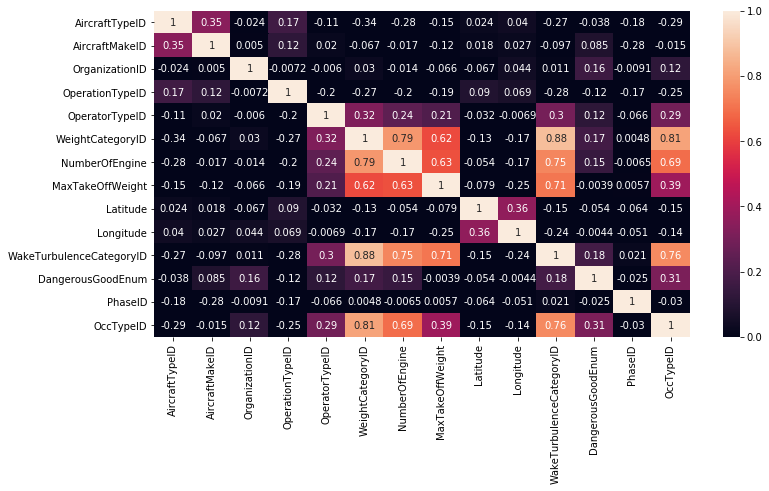

In [257]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.heatmap(df.corr(), annot=True, ax = ax, vmin = 0, vmax = 1)

# Checking for duplicates

In [269]:
df.duplicated(subset=None, keep="first").sum()
#found two duplicates
df.shape

(43814, 15)

In [270]:
col=df.columns
df=df.drop_duplicates(col, keep="first")
df.shape
#Removed the duplicates

(43745, 15)

# Find nulls and remove it

In [271]:
df.isnull().sum().sum()
#gives total number of np.nan in the dataframe

25320

In [272]:
df=df.dropna()
#dropped the nulls and update the dataframe
df.shape

(27504, 15)

# Splitting the dataframe in: (feature,target)

In [273]:
x=df[features]
y=df[target]

In [274]:
# Making the target as category
y=y.astype("category")

# TypeCasting the features which are required for our model
x.AircraftTypeID=x.AircraftTypeID.astype("int64")
#x.OccTime=x.OccTime.astype("int64")
x.dtypes

AircraftTypeID                int64
AircraftMakeID              float64
OrganizationID              float64
OperationTypeID             float64
OperatorTypeID              float64
WeightCategoryID            float64
NumberOfEngine              float64
MaxTakeOffWeight            float64
Latitude                    float64
Longitude                   float64
OccTime                      object
WakeTurbulenceCategoryID    float64
DangerousGoodEnum           float64
PhaseID                     float64
dtype: object

In [275]:
from sklearn.preprocessing import LabelEncoder

In [276]:
label_encoder=LabelEncoder()
x["OrganizationID"]=label_encoder.fit_transform(x["OrganizationID"])
x["AircraftTypeID"]=label_encoder.fit_transform(x["AircraftTypeID"])
x["OccTime"]=label_encoder.fit_transform(x["OccTime"])

In [277]:
"""temp=[]
for i in label_encoder.fit_transform(x["AircraftTypeID"]):
    if i not in temp:
        temp.append(i)
temp"""

'temp=[]\nfor i in label_encoder.fit_transform(x["AircraftTypeID"]):\n    if i not in temp:\n        temp.append(i)\ntemp'

In [278]:
#Checking if features need some more work or not?
x.head(2)
#x.dtypes

AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
181463               2         53063.0             774              9.0   
181461               0         50371.0             271              1.0   

        OperatorTypeID  WeightCategoryID  NumberOfEngine  MaxTakeOffWeight  \
181463             5.0               2.0             1.0            2550.0   
181461             5.0               2.0             1.0            2800.0   

         Latitude  Longitude  OccTime  WakeTurbulenceCategoryID  \
181463  48.050000  54.833333      662                       1.0   
181461  53.566667  64.100000      792                       1.0   

        DangerousGoodEnum  PhaseID  
181463                2.0    108.0  
181461                2.0    218.0

In [279]:
x.dtypes

AircraftTypeID                int64
AircraftMakeID              float64
OrganizationID                int64
OperationTypeID             float64
OperatorTypeID              float64
WeightCategoryID            float64
NumberOfEngine              float64
MaxTakeOffWeight            float64
Latitude                    float64
Longitude                   float64
OccTime                       int32
WakeTurbulenceCategoryID    float64
DangerousGoodEnum           float64
PhaseID                     float64
dtype: object

In [280]:
len(x.AircraftMakeID.unique())

236

In [281]:
x["AircraftMakeID"]=label_encoder.fit_transform(x["AircraftMakeID"])
_y=y.iloc[:,0].values
clock={}
CLOCK={}
for i, v in enumerate(x["AircraftMakeID"]):
    
    if _y[i]==3:
        if v not in clock.keys():
            clock[v]=1
        elif v in clock.keys():
            clock[v]=clock[v]+1
        else:
            print("weird")
        if v not in CLOCK.keys():
            CLOCK[v]=1
        else:
            CLOCK[v]=CLOCK[v]+1
    else:
        if v not in CLOCK.keys():
            CLOCK[v]=1
        else:
            CLOCK[v]=CLOCK[v]+1

            
        #print(v, _y[i])

In [282]:
len(clock)# OF ACCIDENTS

95

In [283]:
len(CLOCK)# OF ACCIDENTS+ # OF INCIDENTS

236

In [284]:
final=[]
for key, value in CLOCK.items():
    if key in clock:
        ratio=clock[key]/CLOCK[key]
        temp=(key, ratio)
        final.append(temp)
    else:
        temp=(key, 0)
        final.append(temp)

In [285]:
final[110]
#clock[79] , CLOCK[79]

(79, 1.0)

# # OF ACCIDENTS : (# OF ACCIDENTS+ # OF INCIDENTS)

In [286]:
_y=y.iloc[:,0].values
_y.shape
y.head()

OccTypeID
181463         1
181461         1
181460         1
181455         1
181453         1

# Classification

In [287]:
x.dtypes

AircraftTypeID                int64
AircraftMakeID                int64
OrganizationID                int64
OperationTypeID             float64
OperatorTypeID              float64
WeightCategoryID            float64
NumberOfEngine              float64
MaxTakeOffWeight            float64
Latitude                    float64
Longitude                   float64
OccTime                       int32
WakeTurbulenceCategoryID    float64
DangerousGoodEnum           float64
PhaseID                     float64
dtype: object

# 
OccID : unique ID
AircraftTypeID : 
AircraftMakeID : 
OrganizationID : 
OperationTypeID : 
OperatorTypeID : 
WeightCategoryID : 
YearOfManuf : 
NumberOfEngine : 
MaxTakeOffWeight : 
NumberOfEngine : 
OccDate : 
OccTime : 
Latitude : 
Longitude : 
DamageLevelID : 
WakeTurbulenceCategoryID : 
DangerousGoodEnum : 
PhaseID : 
TotalFatalCount : 


In [288]:
x.OrganizationID=x.OrganizationID.astype("int64")

In [289]:
label_encoder=LabelEncoder()
x["OrganizationID"]=label_encoder.fit_transform(x["OrganizationID"])

In [290]:
x.OrganizationID

181463     774
181461     271
181460     313
181455     271
181453     271
181446    1494
181438     788
181434     271
181429     271
181427      68
181424     311
181423     114
181421     481
181419     722
181413    1048
181406    1071
181405    1078
181401      68
181395    1494
181394     321
181391    1008
181380     315
181378     356
181377     275
181374     967
181371    1094
181369     827
181368    1151
181367    1022
181366     775
          ... 
190       2850
189       2506
184       2574
183        862
174       3300
173       3300
171       2957
161       2790
160       3395
150       3397
149       3010
145        108
139       3163
137        755
123       1638
120        755
116       2957
106       3300
57         755
52        3014
29         755
26        3482
19        2957
18        2708
16        2681
15        3483
14        2506
11        3193
1         1164
0         2723
Name: OrganizationID, Length: 27504, dtype: int64

In [291]:
# dfa.drop_duplicates(subset ="OccID", 
#                      keep = False, inplace = True) 
# #df.dropna(inplace = True)

### Classify using RFC

In [292]:
#Using knqk's preprocessing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6)

In [294]:
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0).fit(x_train, y_train)

In [295]:
y_pred = model.predict(x_test)
print(y_pred)

[3 3 3 ... 3 3 1]


In [296]:
y_test

OccTypeID
120170         3
24638          3
25254          3
50453          3
68766          3
179349         1
142458         3
29306          3
127377         1
43002          3
171684         1
113431         3
60430          3
106614         3
9846           3
121206         3
107560         3
14470          3
82039          3
56817          3
72449          3
95013          3
48488          3
90939          3
45412          3
73978          3
90164          3
180967         1
27810          3
9662           3
...          ...
156777         1
63883          3
37617          1
176659         1
62245          3
135637         3
66972          3
136610         3
55609          3
181117         1
75158          3
168587         1
68432          3
178069         1
172160         1
173464         1
37475          3
177064         1
100810         3
140655         3
34355          3
45108          3
178197         1
96841          1
114677         3
100200         3
177012         1
48236          3
94733          3
163672         1

[5501 rows x 1 columns]

In [297]:
model.score(x_test, y_test)

0.9465551717869478

# Clustering

In [298]:
from sklearn import neighbors
from sklearn.cluster import KMeans

In [299]:
X_=x
sum_square = {}

for k in range(1, 20):
    kmeans_aviation = KMeans(n_clusters = k).fit(X_)
    sum_square[k] = kmeans_aviation.inertia_
print(X_.shape)
print(X_.columns)
print(X_.head)

(27504, 14)
Index(['AircraftTypeID', 'AircraftMakeID', 'OrganizationID', 'OperationTypeID',
       'OperatorTypeID', 'WeightCategoryID', 'NumberOfEngine',
       'MaxTakeOffWeight', 'Latitude', 'Longitude', 'OccTime',
       'WakeTurbulenceCategoryID', 'DangerousGoodEnum', 'PhaseID'],
      dtype='object')
<bound method NDFrame.head of         AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
181463               2              76             774              9.0   
181461               0              29             271              1.0   
181460               0              62             313              3.0   
181455               0              36             271              1.0   
181453               0              36             271              1.0   
181446               0              51            1494             11.0   
181438               0              43             788             12.0   
181434               0              36             271        

In [300]:
X_.head()

AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
181463               2              76             774              9.0   
181461               0              29             271              1.0   
181460               0              62             313              3.0   
181455               0              36             271              1.0   
181453               0              36             271              1.0   

        OperatorTypeID  WeightCategoryID  NumberOfEngine  MaxTakeOffWeight  \
181463             5.0               2.0             1.0            2550.0   
181461             5.0               2.0             1.0            2800.0   
181460             5.0               1.0             1.0            2150.0   
181455             5.0               3.0             1.0            8000.0   
181453             5.0               2.0             1.0            2313.0   

         Latitude  Longitude  OccTime  WakeTurbulenceCategoryID  \
181463  48.050000  54.833333      662                       1.0   
181461  53.566667  64.100000      792                       1.0   
181460  51.483333  55.816667     1082                       1.0   
181455  53.500000  55.833333      572                       2.0   
181453  53.316667  60.433333     1001                       1.0   

        DangerousGoodEnum  PhaseID  
181463                2.0    108.0  
181461                2.0    218.0  
181460                2.0    194.0  
181455                2.0    194.0  
181453                2.0    194.0

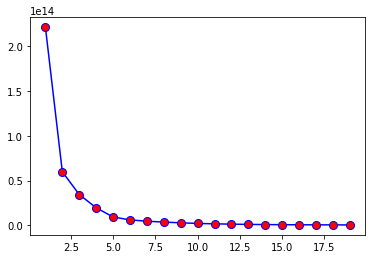

In [301]:
plt.plot(list(sum_square.keys()), list(sum_square.values()),
         linestyle ='-', marker = 'o', color = 'b',
         markersize = 8,markerfacecolor = 'r')

### Clustering with 5 centers

In [302]:
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_)
print('Cluster model K=5 inertia score is: ', kmeans_5.inertia_)
y=kmeans_5.predict(X_)

Cluster model K=5 inertia score is:  9404548106664.162


In [303]:
centers5 = kmeans_5.cluster_centers_
centers5

array([[ 6.21600622e-04,  5.92461538e+01,  1.71104476e+03,
         1.36550117e+00,  4.95493395e+00,  4.00000000e+00,
         2.21149961e+00,  6.59666828e+04,  4.66272914e+01,
         9.26147873e+01,  8.09803108e+02,  2.00000000e+00,
         2.68733489e+00,  1.91796270e+02],
       [ 1.69309011e-15,  3.33769752e+01,  1.08301016e+03,
         1.21896163e+00,  4.95598194e+00,  5.00000000e+00,
         3.34988713e+00,  3.55084685e+05,  4.88333725e+01,
         7.58793739e+01,  7.62255079e+02,  3.00000000e+00,
         2.52821670e+00,  1.89323928e+02],
       [ 3.66810003e-01,  7.15953944e+01,  1.56533580e+03,
         3.95213308e+00,  4.79229376e+00,  2.33789748e+00,
         1.62164762e+00,  9.90889499e+03,  5.00644094e+01,
         9.41905242e+01,  8.07617291e+02,  1.46299649e+00,
         2.52993097e+00,  1.84604051e+02],
       [-9.68669589e-15,  4.84173949e+01,  1.36500874e+03,
         1.16645859e+00,  4.96296296e+00,  4.04910529e+00,
         2.38327091e+00,  2.02161196e+05,  4.

In [304]:
X_['klabels_5'] = kmeans_5.labels_

In [305]:
df.columns

Index(['AircraftTypeID', 'AircraftMakeID', 'OrganizationID', 'OperationTypeID',
       'OperatorTypeID', 'WeightCategoryID', 'NumberOfEngine',
       'MaxTakeOffWeight', 'Latitude', 'Longitude', 'OccTime',
       'WakeTurbulenceCategoryID', 'DangerousGoodEnum', 'PhaseID',
       'OccTypeID'],
      dtype='object')

In [306]:
X_.head()
#X_.shape

AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
181463               2              76             774              9.0   
181461               0              29             271              1.0   
181460               0              62             313              3.0   
181455               0              36             271              1.0   
181453               0              36             271              1.0   

        OperatorTypeID  WeightCategoryID  NumberOfEngine  MaxTakeOffWeight  \
181463             5.0               2.0             1.0            2550.0   
181461             5.0               2.0             1.0            2800.0   
181460             5.0               1.0             1.0            2150.0   
181455             5.0               3.0             1.0            8000.0   
181453             5.0               2.0             1.0            2313.0   

         Latitude  Longitude  OccTime  WakeTurbulenceCategoryID  \
181463  48.050000  54.833333      662                       1.0   
181461  53.566667  64.100000      792                       1.0   
181460  51.483333  55.816667     1082                       1.0   
181455  53.500000  55.833333      572                       2.0   
181453  53.316667  60.433333     1001                       1.0   

        DangerousGoodEnum  PhaseID  klabels_5  
181463                2.0    108.0          2  
181461                2.0    218.0          2  
181460                2.0    194.0          2  
181455                2.0    194.0          2  
181453                2.0    194.0          2

In [307]:
# Y=dfa["OccTypeID"]
# y is your prediction
# compare y and Y in the metrics

In [308]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(df['OccTypeID'], kmeans_5.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.00      0.01      8349
           2       0.00      0.00      0.00         0
           3       0.98      0.12      0.22     19155
           4       0.00      0.00      0.00         0

    accuracy                           0.09     27504
   macro avg       0.20      0.03      0.05     27504
weighted avg       0.69      0.09      0.15     27504



In [309]:
X_.klabels_5.value_counts()

2    17674
0     6435
3     2403
1      886
4      106
Name: klabels_5, dtype: int64

In [310]:
df.OccTypeID.value_counts()

3    19155
1     8349
Name: OccTypeID, dtype: int64

### Clustering with 4 centers

In [311]:
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(X_)
print('Cluster model K=4 inertia score is: ', kmeans_4.inertia_)
y=kmeans_4.predict(X_)

Cluster model K=4 inertia score is:  19679643267589.305


In [312]:
centers4 = kmeans_4.cluster_centers_
centers4

array([[ 3.59806860e-01,  7.22208902e+01,  1.57604329e+03,
         3.89815740e+00,  4.79526030e+00,  2.36963037e+00,
         1.62909313e+00,  1.04565034e+04,  4.99683328e+01,
         9.40223735e+01,  8.08272561e+02,  1.47324897e+00,
         2.53596404e+00,  1.84750472e+02,  1.96181596e+00],
       [ 1.72084569e-15,  3.49270483e+01,  1.06469697e+03,
         1.26038159e+00,  4.96408530e+00,  5.00000000e+00,
         3.50280584e+00,  4.02575588e+05,  4.87344543e+01,
         7.58370366e+01,  7.73417508e+02,  3.00000000e+00,
         2.46464646e+00,  1.89777778e+02,  1.35690236e+00],
       [ 6.55415369e-04,  5.66357529e+01,  1.68799640e+03,
         1.37883008e+00,  4.95510405e+00,  4.00000000e+00,
         2.22267737e+00,  6.76470813e+04,  4.67120795e+01,
         9.29866333e+01,  8.07865476e+02,  2.00147468e+00,
         2.67835491e+00,  1.91761920e+02,  5.89873833e-03],
       [-1.00475184e-14,  4.77524077e+01,  1.36123836e+03,
         1.16412520e+00,  4.96227929e+00,  4.08788122

In [313]:
X_['klabels_4'] = kmeans_4.labels_

In [314]:
df.columns

Index(['AircraftTypeID', 'AircraftMakeID', 'OrganizationID', 'OperationTypeID',
       'OperatorTypeID', 'WeightCategoryID', 'NumberOfEngine',
       'MaxTakeOffWeight', 'Latitude', 'Longitude', 'OccTime',
       'WakeTurbulenceCategoryID', 'DangerousGoodEnum', 'PhaseID',
       'OccTypeID'],
      dtype='object')

In [315]:
X_.head()
#X_.shape

AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
181463               2              76             774              9.0   
181461               0              29             271              1.0   
181460               0              62             313              3.0   
181455               0              36             271              1.0   
181453               0              36             271              1.0   

        OperatorTypeID  WeightCategoryID  NumberOfEngine  MaxTakeOffWeight  \
181463             5.0               2.0             1.0            2550.0   
181461             5.0               2.0             1.0            2800.0   
181460             5.0               1.0             1.0            2150.0   
181455             5.0               3.0             1.0            8000.0   
181453             5.0               2.0             1.0            2313.0   

         Latitude  Longitude  OccTime  WakeTurbulenceCategoryID  \
181463  48.050000  54.833333      662                       1.0   
181461  53.566667  64.100000      792                       1.0   
181460  51.483333  55.816667     1082                       1.0   
181455  53.500000  55.833333      572                       2.0   
181453  53.316667  60.433333     1001                       1.0   

        DangerousGoodEnum  PhaseID  klabels_5  klabels_4  
181463                2.0    108.0          2          0  
181461                2.0    218.0          2          0  
181460                2.0    194.0          2          0  
181455                2.0    194.0          2          0  
181453                2.0    194.0          2          0

In [316]:
# Y=dfa["OccTypeID"]
# y is your prediction
# compare y and Y in the metrics

In [317]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(df['OccTypeID'], kmeans_4.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.00      0.01      8349
           2       0.00      0.00      0.00         0
           3       0.98      0.13      0.23     19155

    accuracy                           0.09     27504
   macro avg       0.26      0.03      0.06     27504
weighted avg       0.70      0.09      0.16     27504



In [318]:
print(confusion_matrix(df['OccTypeID'], kmeans_4.labels_))

[[   0    0    0    0]
 [8159   34  113   43]
 [   0    0    0    0]
 [9859  857 5990 2449]]


In [319]:
from sklearn.metrics import accuracy_score
accuracy_score(df.OccTypeID, kmeans_4.labels_)

0.09027777777777778

In [320]:
X_.klabels_4.value_counts()

0    18018
2     6103
3     2492
1      891
Name: klabels_4, dtype: int64

In [321]:
df.OccTypeID.value_counts()

3    19155
1     8349
Name: OccTypeID, dtype: int64

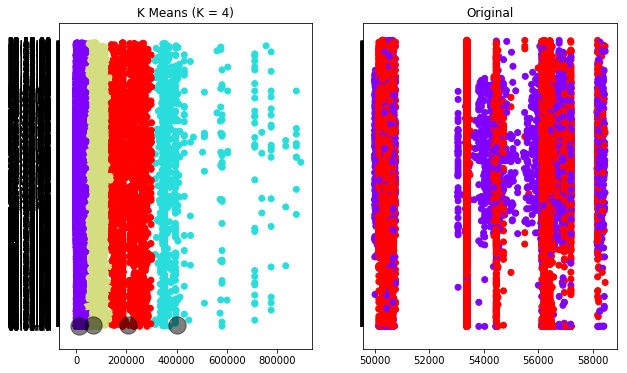

In [343]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 4)')
ax1.scatter(x = X_['MaxTakeOffWeight'], y = X_['OccTime'], 
            c = X_['klabels_4'], cmap='rainbow')
ax1.scatter(x=centers4[:, 7], y=centers4[:, 5],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = dfm['AircraftMakeID'], y = dfm['OccTime'], 
            c = dfm['OccTypeID'], cmap='rainbow')

### Clustering with 3 centers

In [322]:
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(X_)
print('Cluster model K=4 inertia score is: ', kmeans_3.inertia_)
y=kmeans_3.predict(X_)

Cluster model K=4 inertia score is:  34400523051240.65


In [323]:
centers3 = kmeans_3.cluster_centers_
centers3

array([[ 2.71331772e-01,  6.86457671e+01,  1.60082684e+03,
         3.27982265e+00,  4.83457420e+00,  2.77128994e+00,
         1.77689476e+00,  2.41155779e+04,  4.91725627e+01,
         9.39091679e+01,  8.08600427e+02,  1.60301991e+00,
         2.57093860e+00,  1.86525054e+02,  1.47850092e+00,
         4.92722101e-01],
       [-1.08524301e-14,  4.61146026e+01,  1.41169242e+03,
         1.16044362e+00,  4.96229205e+00,  4.08096118e+00,
         2.35822551e+00,  1.98913950e+05,  4.68634554e+01,
         7.52124210e+01,  7.63911275e+02,  2.92458410e+00,
         2.66580407e+00,  1.89835490e+02,  2.70240296e+00,
         2.92125693e+00],
       [ 1.72084569e-15,  3.49270483e+01,  1.06469697e+03,
         1.26038159e+00,  4.96408530e+00,  5.00000000e+00,
         3.50280584e+00,  4.02575588e+05,  4.87344543e+01,
         7.58370366e+01,  7.73417508e+02,  3.00000000e+00,
         2.46464646e+00,  1.89777778e+02,  1.35690236e+00,
         1.00000000e+00]])

In [324]:
X_['klabels_3'] = kmeans_3.labels_

In [325]:
df.columns

Index(['AircraftTypeID', 'AircraftMakeID', 'OrganizationID', 'OperationTypeID',
       'OperatorTypeID', 'WeightCategoryID', 'NumberOfEngine',
       'MaxTakeOffWeight', 'Latitude', 'Longitude', 'OccTime',
       'WakeTurbulenceCategoryID', 'DangerousGoodEnum', 'PhaseID',
       'OccTypeID'],
      dtype='object')

In [326]:
X_.head()
#X_.shape

AircraftTypeID  AircraftMakeID  OrganizationID  OperationTypeID  \
181463               2              76             774              9.0   
181461               0              29             271              1.0   
181460               0              62             313              3.0   
181455               0              36             271              1.0   
181453               0              36             271              1.0   

        OperatorTypeID  WeightCategoryID  NumberOfEngine  MaxTakeOffWeight  \
181463             5.0               2.0             1.0            2550.0   
181461             5.0               2.0             1.0            2800.0   
181460             5.0               1.0             1.0            2150.0   
181455             5.0               3.0             1.0            8000.0   
181453             5.0               2.0             1.0            2313.0   

         Latitude  Longitude  OccTime  WakeTurbulenceCategoryID  \
181463  48.050000  54.833333      662                       1.0   
181461  53.566667  64.100000      792                       1.0   
181460  51.483333  55.816667     1082                       1.0   
181455  53.500000  55.833333      572                       2.0   
181453  53.316667  60.433333     1001                       1.0   

        DangerousGoodEnum  PhaseID  klabels_5  klabels_4  klabels_3  
181463                2.0    108.0          2          0          0  
181461                2.0    218.0          2          0          0  
181460                2.0    194.0          2          0          0  
181455                2.0    194.0          2          0          0  
181453                2.0    194.0          2          0          0

In [327]:
# Y=dfa["OccTypeID"]
# y is your prediction
# compare y and Y in the metrics

In [328]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(df['OccTypeID'], kmeans_3.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.02      0.01      0.01      8349
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00     19155

    accuracy                           0.00     27504
   macro avg       0.00      0.00      0.00     27504
weighted avg       0.01      0.00      0.00     27504



In [329]:
print(confusion_matrix(df['OccTypeID'], kmeans_3.labels_))

[[    0     0     0     0]
 [ 8268    47    34     0]
 [    0     0     0     0]
 [15640  2658   857     0]]


In [330]:
X_.klabels_3.value_counts()

0    23908
1     2705
2      891
Name: klabels_3, dtype: int64

In [331]:
df.OccTypeID.value_counts()

3    19155
1     8349
Name: OccTypeID, dtype: int64